### Playground Mamdani Triangular

In [1]:
from notebook_resolver import *
from src.utils.pandas_extension import *
from src.dataset import Dataset, WorkSheet

dataset_path = "data/e-nose_dataset_12_beef_cuts.xlsx"


dataset = Dataset(
	path=dataset_path, sheet_name=WorkSheet.DS1.value,
)

train_df = dataset.train_df
test_df = dataset.validate_df


In [2]:
from sklearn.metrics import r2_score
from src.pipeline import Pipeline
from src.pipelines.transformers import FeatureScaler
from src.pipelines.predictors import MamdaniPredictor
from src.fis.fuzzy_logic.mfs import MFType1
from src.clusters import ClusteringMethod

target_column = 'TVC'

pipeline = Pipeline(steps=[
	('feature_scaler', FeatureScaler(decimal_places=4)),
	('predictor', MamdaniPredictor(target=target_column))
])

pipeline.fit(
    train_df, # pipeline fit only for training dataframe
    predictor__clustering_method=ClusteringMethod.MBKMEANS,
	predictor__mf_type=MFType1.TRIANGULAR,
)

transformed_test_df = pipeline.transform(test_df)
X_test_df = transformed_test_df.drop(columns=[target_column])

y_test_ = transformed_test_df[target_column].values
y_pred_ = pipeline.predict(X_test_df)

r2 = r2_score(y_test_, y_pred_)
print(f"R2 Score on Test Data: {r2}")

R2 Score on Test Data: 0.5722398972008043


In [3]:
predictor = pipeline.named_steps['predictor']

In [4]:
predictor.get_lt_rules()

+--------+-----------+------------------------------------------+----------------------+
| Rule   | Cluster   | IF (Antecedents)                         | THEN (Consequents)   |
+========+===========+==========================================+======================+
| Rule 1 | Cluster 0 | MQ135 is Low AND MQ136 is Low AND MQ137  | TVC is High          |
|        |           | is High AND MQ138 is Low AND MQ2 is Low  |                      |
|        |           | AND MQ3 is Low AND MQ4 is Low AND MQ5 is |                      |
|        |           | High AND MQ6 is High AND MQ8 is Medium   |                      |
|        |           | AND MQ9 is Low                           |                      |
+--------+-----------+------------------------------------------+----------------------+
| Rule 2 | Cluster 1 | MQ135 is High AND MQ136 is High AND      | TVC is Very_Low      |
|        |           | MQ137 is Low AND MQ138 is High AND MQ2   |                      |
|        |           

,Rule,Cluster,IF (Antecedents),THEN (Consequents)
0,Rule 1,Cluster 0,MQ135 is Low AND MQ136 is Low AND MQ137 is Hig...,TVC is High
1,Rule 2,Cluster 1,MQ135 is High AND MQ136 is High AND MQ137 is L...,TVC is Very_Low


In [5]:
predictor.clusters_.get_execution_time_stats('_create_mfs_clusters')

{'count': 1,
 'total_time': 3.951718042138964,
 'average_time': 3.951718042138964,
 'min_time': 3.951718042138964,
 'max_time': 3.951718042138964}

In [6]:
predictor.clusters_.get_execution_time_stats('_create_rules_cluster')

{'count': 1,
 'total_time': 0.27714483393356204,
 'average_time': 0.27714483393356204,
 'min_time': 0.27714483393356204,
 'max_time': 0.27714483393356204}

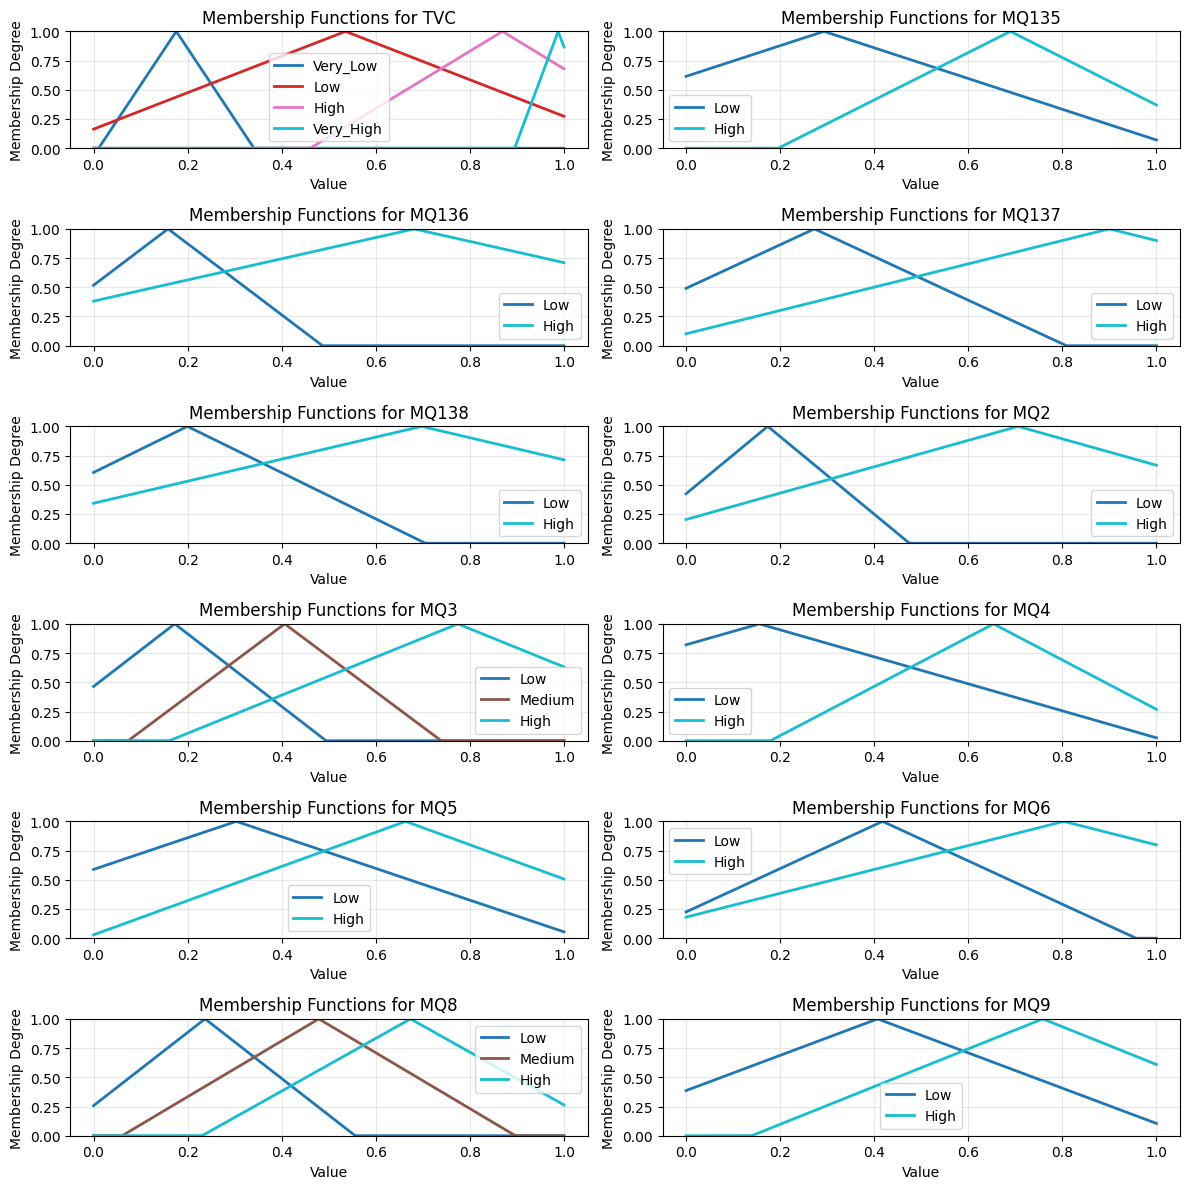

In [7]:
predictor.plot_mfs_grid()

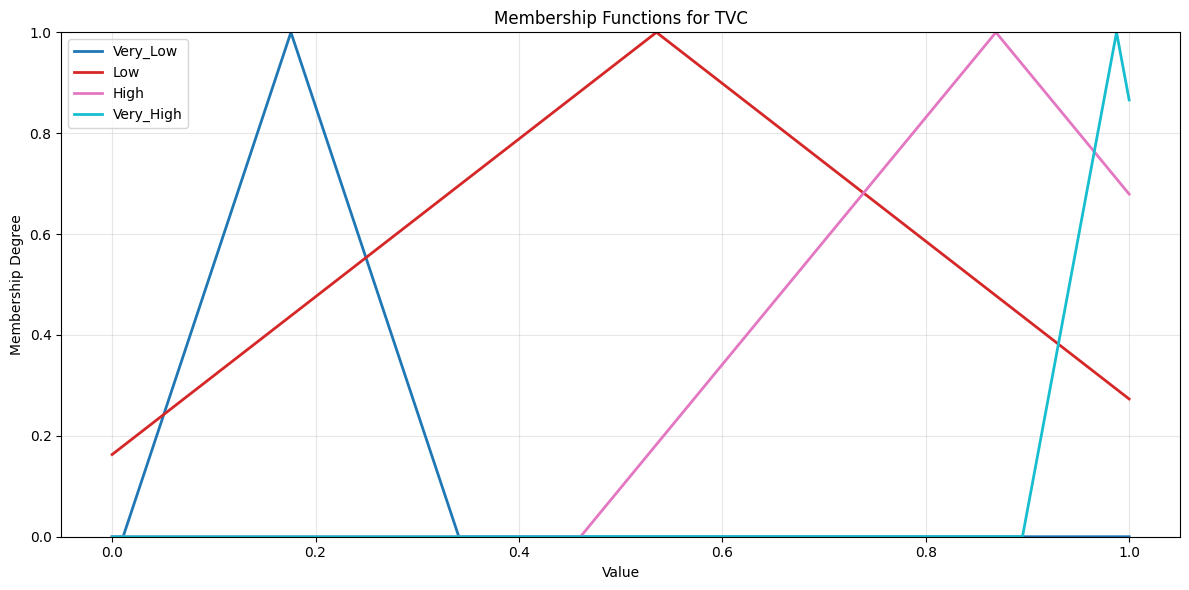

In [8]:
predictor.plot_mf('TVC')

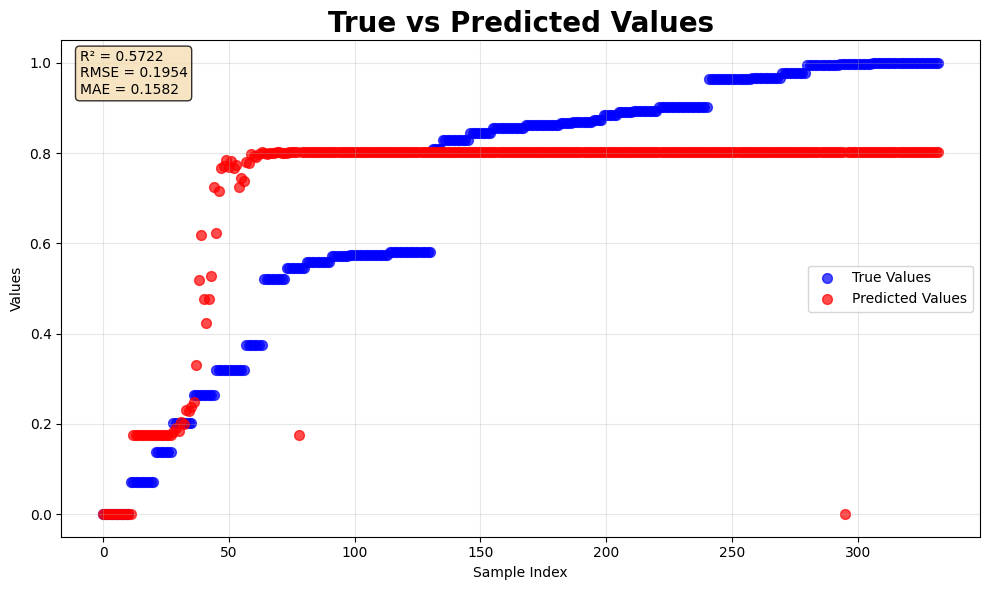

In [9]:
predictor.plot_true_vs_pred(y_test_, y_pred_)